### Table of Contents:
* [1. Preparing the Data](#1)
* &emsp;[1.1. Importing Libraries](#11)
* [2. Data Cleaning](#2)
* &emsp;[2.1. Identifying Missing Values](#21)
* &emsp;[2.2. Dealing with Missing Values](#22)
* &emsp;[2.3. Removing Rows](#23)
* &emsp;[2.4. Finding Outliers](#24)
* &emsp;&emsp;[2.4.1. IQR Score Method](#241)
* &emsp;[2.5. Box Plot](#25)
* [3. Data Transformation](#3)
* &emsp;[3.1. Binning](#31)
* &emsp;[3.2. Normalization](#32)
* &emsp;&emsp;[3.2.1. Z-score Method](#33)
* [4. Results](#4)
* &emsp;[4.1. Data Cleaning](#41)
* &emsp;[4.2. Data Transformation](#42)

# 1. Preparing the Data <a class="anchor" id="1"></a>

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [8]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline  
plt.style.use('fivethirtyeight')

# 2. Data Cleaning <a class="anchor" id="2"></a>

## 2.1. Identifying Missing Values <a class="anchor" id="21"></a>

In [9]:
df = pd.read_csv('data/raw_training_data.csv')

In [10]:
#categorical_features = ['company','country','director','genre','rating','released','star','year',
#                        'writer','adult','original_title','overview','tagline','title','genres_edited',
#                        'spoken_languages_edited','production_countries_edited','keywords_edited']
continuous_features = ['budget','runtime','score','votes','popularity']
target_features = ['isprofit','profitability_ratio']

In [11]:
df.shape # (# rows, # cols)

(3524, 18)

In [12]:
df.head() # take a peak at the dataset

,Unnamed: 0,budget,gross,name,released,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,imdb_id,original_title,popularity,title,year_released
0,0,8000000,52287414,Stand by Me,22.08.1986 00:00,89,8.1,299174,1986,1,5.535927,550,235,tt0092005,Stand by Me,15.206957,Stand by Me,1986
1,1,6000000,70136369,Ferris Bueller's Day Off,11.06.1986 00:00,103,7.8,264740,1986,1,10.689395,1070,9377,tt0091042,Ferris Bueller's Day Off,12.724645,Ferris Bueller's Day Off,1986
2,2,15000000,179800601,Top Gun,16.05.1986 00:00,110,6.9,236909,1986,1,10.986707,1100,744,tt0092099,Top Gun,20.301019,Top Gun,1986
3,3,18500000,85160248,Aliens,18.07.1986 00:00,137,8.4,540152,1986,1,3.603257,360,679,tt0090605,Aliens,21.761179,Aliens,1986
4,4,9000000,18564613,Flight of the Navigator,1.08.1986 00:00,90,6.9,36636,1986,1,1.062735,110,10122,tt0091059,Flight of the Navigator,5.526865,Flight of the Navigator,1986


In [13]:
del df['Unnamed: 0']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      3524 non-null   int64  
 1   gross                       3524 non-null   int64  
 2   name                        3524 non-null   object 
 3   released                    3524 non-null   object 
 4   runtime                     3524 non-null   int64  
 5   score                       3524 non-null   float64
 6   votes                       3524 non-null   int64  
 7   year                        3524 non-null   int64  
 8   isprofit                    3524 non-null   int64  
 9   profitability_ratio         3524 non-null   float64
 10  profitability_ratio_bucket  3524 non-null   int64  
 11  id                          3524 non-null   int64  
 12  imdb_id                     3524 non-null   object 
 13  original_title              3524 

In [15]:
df.isnull().sum()

budget                        0
gross                         0
name                          0
released                      0
runtime                       0
score                         0
votes                         0
year                          0
isprofit                      0
profitability_ratio           0
profitability_ratio_bucket    0
id                            0
imdb_id                       0
original_title                0
popularity                    0
title                         0
year_released                 0
dtype: int64

In [16]:
df.describe()   # before replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.2. Dealing with Missing Values <a class="anchor" id="22"></a>

By observing the data, we see that only the following columns need initial transformation to replace zeros with the value None:
* overview
* tagline
* spoken_languages_edited
* production_countries_edited
* keywords_edited

And the remaining features do not have to change since they do not contain zero values.

In [18]:
#df['overview'] = df['overview'].map(lambda x:x if x != 0 else None)
#df['tagline'] = df['tagline'].map(lambda x:x if x != 0 else None)
#df['spoken_languages_edited'] = df['spoken_languages_edited'].map(lambda x:x if x != 0 else None)
#df['production_countries_edited'] = df['production_countries_edited'].map(lambda x:x if x != 0 else None)
#df['keywords_edited'] = df['keywords_edited'].map(lambda x:x if x != 0 else None)

In [19]:
df.head()   # take a peak at the dataset

,budget,gross,name,released,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,imdb_id,original_title,popularity,title,year_released
0,8000000,52287414,Stand by Me,22.08.1986 00:00,89,8.1,299174,1986,1,5.535927,550,235,tt0092005,Stand by Me,15.206957,Stand by Me,1986
1,6000000,70136369,Ferris Bueller's Day Off,11.06.1986 00:00,103,7.8,264740,1986,1,10.689395,1070,9377,tt0091042,Ferris Bueller's Day Off,12.724645,Ferris Bueller's Day Off,1986
2,15000000,179800601,Top Gun,16.05.1986 00:00,110,6.9,236909,1986,1,10.986707,1100,744,tt0092099,Top Gun,20.301019,Top Gun,1986
3,18500000,85160248,Aliens,18.07.1986 00:00,137,8.4,540152,1986,1,3.603257,360,679,tt0090605,Aliens,21.761179,Aliens,1986
4,9000000,18564613,Flight of the Navigator,1.08.1986 00:00,90,6.9,36636,1986,1,1.062735,110,10122,tt0091059,Flight of the Navigator,5.526865,Flight of the Navigator,1986


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   budget                      3524 non-null   int64  
 1   gross                       3524 non-null   int64  
 2   name                        3524 non-null   object 
 3   released                    3524 non-null   object 
 4   runtime                     3524 non-null   int64  
 5   score                       3524 non-null   float64
 6   votes                       3524 non-null   int64  
 7   year                        3524 non-null   int64  
 8   isprofit                    3524 non-null   int64  
 9   profitability_ratio         3524 non-null   float64
 10  profitability_ratio_bucket  3524 non-null   int64  
 11  id                          3524 non-null   int64  
 12  imdb_id                     3524 non-null   object 
 13  original_title              3524 

In [21]:
df.isnull().sum()

budget                        0
gross                         0
name                          0
released                      0
runtime                       0
score                         0
votes                         0
year                          0
isprofit                      0
profitability_ratio           0
profitability_ratio_bucket    0
id                            0
imdb_id                       0
original_title                0
popularity                    0
title                         0
year_released                 0
dtype: int64

In [22]:
df.describe()   # after replacing zero with None

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


## 2.3. Removing Rows <a class="anchor" id="23"></a>

In [23]:
data_dropped = df.dropna()

In [24]:
data_dropped = data_dropped.reset_index() 
del data_dropped['index']

In [25]:
data_dropped.shape

(3524, 17)

In [26]:
df.shape

(3524, 17)

In [27]:
num_rows_lost = round(100*(df.shape[0] - data_dropped.shape[0])/float(df.shape[0]))

In [28]:
template = 'retained {}% of rows'
template.format(num_rows_lost)

'retained 0% of rows'

In [29]:
# class distribution
class_counts = data_dropped.groupby('isprofit').size()
class_counts

isprofit
0    1725
1    1799
dtype: int64

In [30]:
class_counts[0]/df['isprofit'].size

0.4895005675368899

In [31]:
df['isprofit'].value_counts(normalize=True)   #  split of trues and falses before rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [32]:
data_dropped['isprofit'].value_counts(normalize=True)   #  split of trues and falses after rows dropped

1    0.510499
0    0.489501
Name: isprofit, dtype: float64

In [33]:
data_dropped.describe()   # after removing rows which include NaN

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,3.524000e+03,3.524000e+03,3524.000000,3524.000000,3.524000e+03,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000,3524.000000
mean,3.646837e+07,4.772520e+07,107.189274,6.339018,9.928306e+04,1997.125709,0.510499,3.996876,399.602157,45443.112656,9.785946,2002.385641
std,4.063369e+07,6.707121e+07,18.472177,1.056288,1.568040e+05,101.418026,0.499961,127.868810,12786.904323,77014.289184,13.318482,8.422442
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.999979,-100.000000,0.000000,0.000000,1986.000000
25%,1.000000e+07,6.955428e+06,95.000000,5.800000,1.554475e+04,1996.000000,0.000000,-0.552571,-60.000000,8864.750000,5.746421,1996.000000
50%,2.300000e+07,2.511110e+07,104.000000,6.400000,4.403550e+04,2002.000000,1.000000,0.020240,0.000000,12513.500000,8.411079,2003.000000
75%,4.800000e+07,6.036672e+07,117.000000,7.000000,1.148628e+05,2009.000000,1.000000,1.029155,100.000000,41220.250000,11.654501,2010.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000,1.000000,7193.587333,719360.000000,404378.000000,547.488298,2017.000000


In [34]:
# % change in means of columns before and after dropping missing-value rows
change_in_means = ((data_dropped.mean() - df.mean()) / df.mean() * 100).round(2)
change_in_means

budget                        0.0
gross                         0.0
runtime                       0.0
score                         0.0
votes                         0.0
year                          0.0
isprofit                      0.0
profitability_ratio           0.0
profitability_ratio_bucket    0.0
id                            0.0
popularity                    0.0
year_released                 0.0
dtype: float64

### Bar Chart of the Change in Means

Text(0, 0.5, '% change')

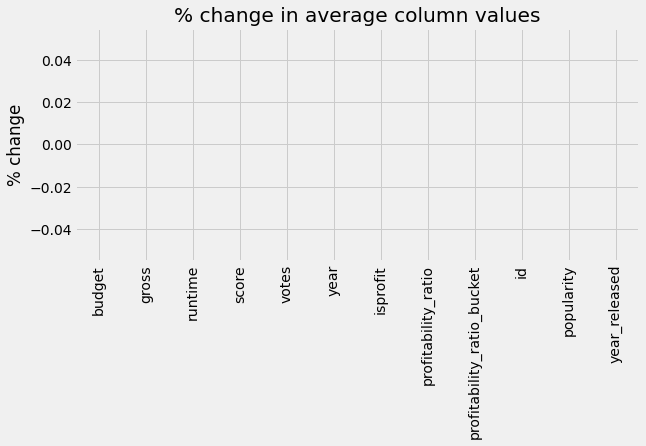

In [35]:
plt.figure(figsize=(9, 4))
change_in_means.plot.bar(title='% change in average column values')
plt.ylabel('% change')


Figure 1: Percent change in average column values
<p>Figure 1 shows the percent change in mean of columns before and after dropping missing-value rows.</p>

## 2.4. Finding Outliers <a class="anchor" id="24"></a>

### 2.4.1. IQR Score Method <a class="anchor" id="241"></a>

In [36]:
Q1 = data_dropped.quantile(0.25)
Q3 = data_dropped.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                        3.800000e+07
gross                         5.341130e+07
runtime                       2.200000e+01
score                         1.200000e+00
votes                         9.931800e+04
year                          1.300000e+01
isprofit                      1.000000e+00
profitability_ratio           1.581726e+00
profitability_ratio_bucket    1.600000e+02
id                            3.235550e+04
popularity                    5.908080e+00
year_released                 1.400000e+01
dtype: float64


In [37]:
print((data_dropped < (Q1 - (1.5 * IQR))) | (data_dropped > (Q3 + (1.5 * IQR))))

      budget  gross     id  imdb_id  isprofit   name  original_title  \
0      False  False  False    False     False  False           False   
1      False  False  False    False     False  False           False   
2      False   True  False    False     False  False           False   
3      False  False  False    False     False  False           False   
4      False  False  False    False     False  False           False   
...      ...    ...    ...      ...       ...    ...             ...   
3519   False  False   True    False     False  False           False   
3520   False  False   True    False     False  False           False   
3521   False  False   True    False     False  False           False   
3522   False  False   True    False     False  False           False   
3523   False  False   True    False     False  False           False   

      popularity  profitability_ratio  profitability_ratio_bucket  released  \
0          False                 True                   

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [38]:
data_dropped.shape

(3524, 17)

In [39]:
data_dropped_outlier_IQR = data_dropped[~((data_dropped < (Q1 - 1.5 * IQR)) | (data_dropped > (Q3 + 1.5 * IQR))).any(axis=1)]

c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
c:\users\jaymish\desktop\pcs\web2txt\webapp\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [40]:
data_dropped_outlier_IQR.shape

(2336, 17)

In [41]:
data_dropped_outlier_IQR = data_dropped_outlier_IQR.reset_index()
del data_dropped_outlier_IQR['index']
data_dropped_outlier_IQR

,budget,gross,name,released,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,imdb_id,original_title,popularity,title,year_released
0,9000000,18564613,Flight of the Navigator,1.08.1986 00:00,90,6.9,36636,1986,1,1.062735,110,10122,tt0091059,Flight of the Navigator,5.526865,Flight of the Navigator,1986
1,6000000,8551228,Blue Velvet,23.10.1986 00:00,120,7.8,146768,1986,1,0.425205,40,793,tt0090756,Blue Velvet,7.882247,Blue Velvet,1986
2,16000000,5900000,Highlander,7.03.1986 00:00,116,7.2,104860,1986,0,-0.631250,-60,8009,tt0091203,Highlander,16.870392,Highlander,1986
3,6000000,8200000,Lucas,28.03.1986 00:00,100,6.8,12228,1986,1,0.366667,40,13346,tt0091445,Lucas,4.575350,Lucas,1986
4,25000000,11100000,Big Trouble in Little China,2.07.1986 00:00,99,7.3,101678,1986,0,-0.556000,-60,6978,tt0090728,Big Trouble in Little China,11.109932,Big Trouble in Little China,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,95000000,17223265,Seventh Son,6.02.2015 00:00,102,5.5,61441,2014,0,-0.818702,-80,68737,tt1121096,Seventh Son,15.297821,Seventh Son,2015
2332,24000000,12096300,Foxcatcher,16.01.2015 00:00,134,7.0,117034,2014,0,-0.495988,-50,87492,tt1100089,Foxcatcher,8.103570,Foxcatcher,2015
2333,10000000,14479776,Big Eyes,25.12.2014 00:00,106,7.0,66972,2014,1,0.447978,40,87093,tt1126590,Big Eyes,7.412826,Big Eyes,2014
2334,15000000,1108247,Macbeth,11.12.2015 00:00,113,6.7,43481,2015,0,-0.926117,-90,41149,tt0079499,Macbeth,0.398025,A Performance of Macbeth,2015


In [42]:
data_dropped_outlier_IQR.describe()

,budget,gross,runtime,score,votes,year,isprofit,profitability_ratio,profitability_ratio_bucket,id,popularity,year_released
count,2.336000e+03,2.336000e+03,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000
mean,2.812377e+07,2.827667e+07,105.166952,6.250856,52168.505993,2000.103596,0.433219,0.100741,10.003425,19130.776113,7.708499,2000.269264
std,2.282852e+07,2.929657e+07,14.093370,0.840373,55622.410590,7.262085,0.495626,0.974762,97.586577,19101.203877,3.649485,7.321308
min,2.000000e+04,3.090000e+02,69.000000,4.000000,456.000000,1986.000000,0.000000,-0.999979,-100.000000,5.000000,0.000578,1986.000000
25%,1.000000e+07,5.410719e+06,95.000000,5.700000,11899.750000,1994.000000,0.000000,-0.634612,-60.000000,9035.500000,5.222567,1995.000000
50%,2.200000e+07,1.832070e+07,102.500000,6.300000,31530.000000,2000.000000,0.000000,-0.163279,-20.000000,11519.000000,7.514438,2001.000000
75%,4.000000e+07,4.132717e+07,114.000000,6.900000,72160.500000,2006.000000,1.000000,0.556042,60.000000,23629.500000,10.082232,2006.000000
max,1.050000e+08,1.404647e+08,150.000000,8.200000,263834.000000,2015.000000,1.000000,3.399053,340.000000,89691.000000,19.420510,2015.000000


## 2.5. Box Plot <a class="anchor" id="25"></a>

### Boxplot of Initial Data

<AxesSubplot:>

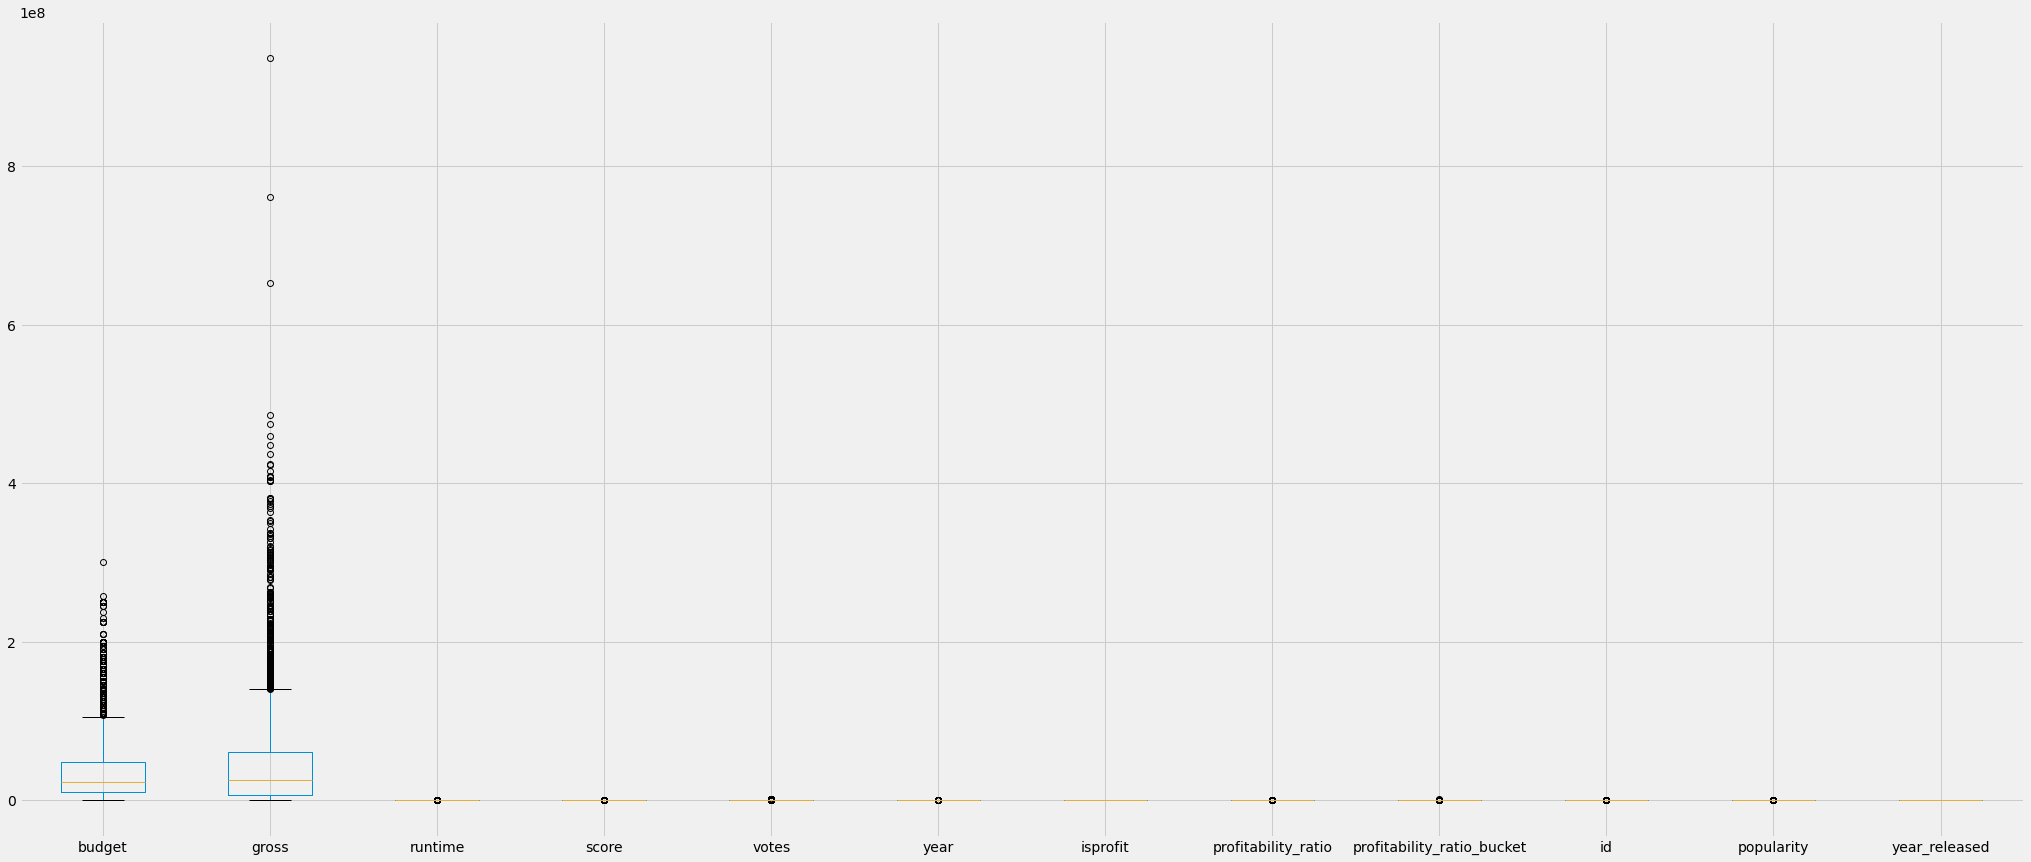

In [43]:
df.plot(x=df.index.name, kind='box', figsize=(32, 14))

Figure 2: Data Distribution before Cleaning
<p>Figure 2 shows the distribution of the data before dropping rows. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Data

<AxesSubplot:>

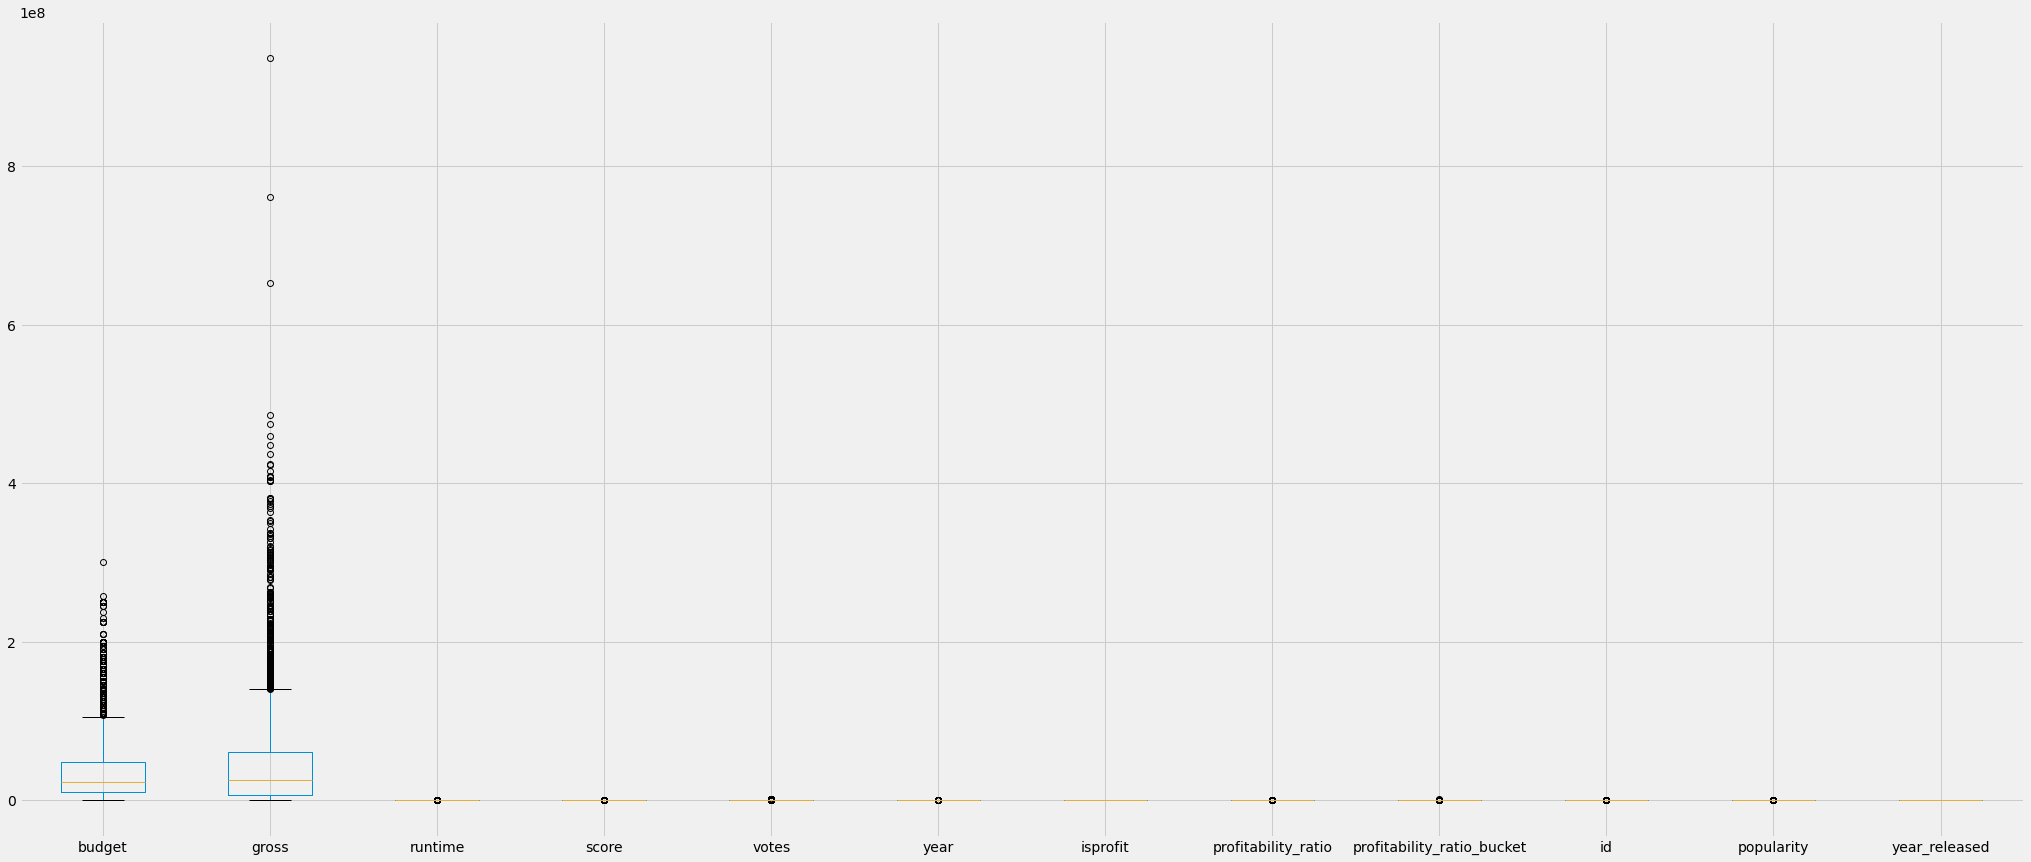

In [44]:
data_dropped.plot(x=data_dropped.index.name, kind='box', figsize=(32, 14))

Figure 3: Data Distribution of Dropped Data
<p>Figure 3 shows the distibution of data after dropping rows with the value NaN. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

### Boxplot of Dropped Outlier Data

<AxesSubplot:>

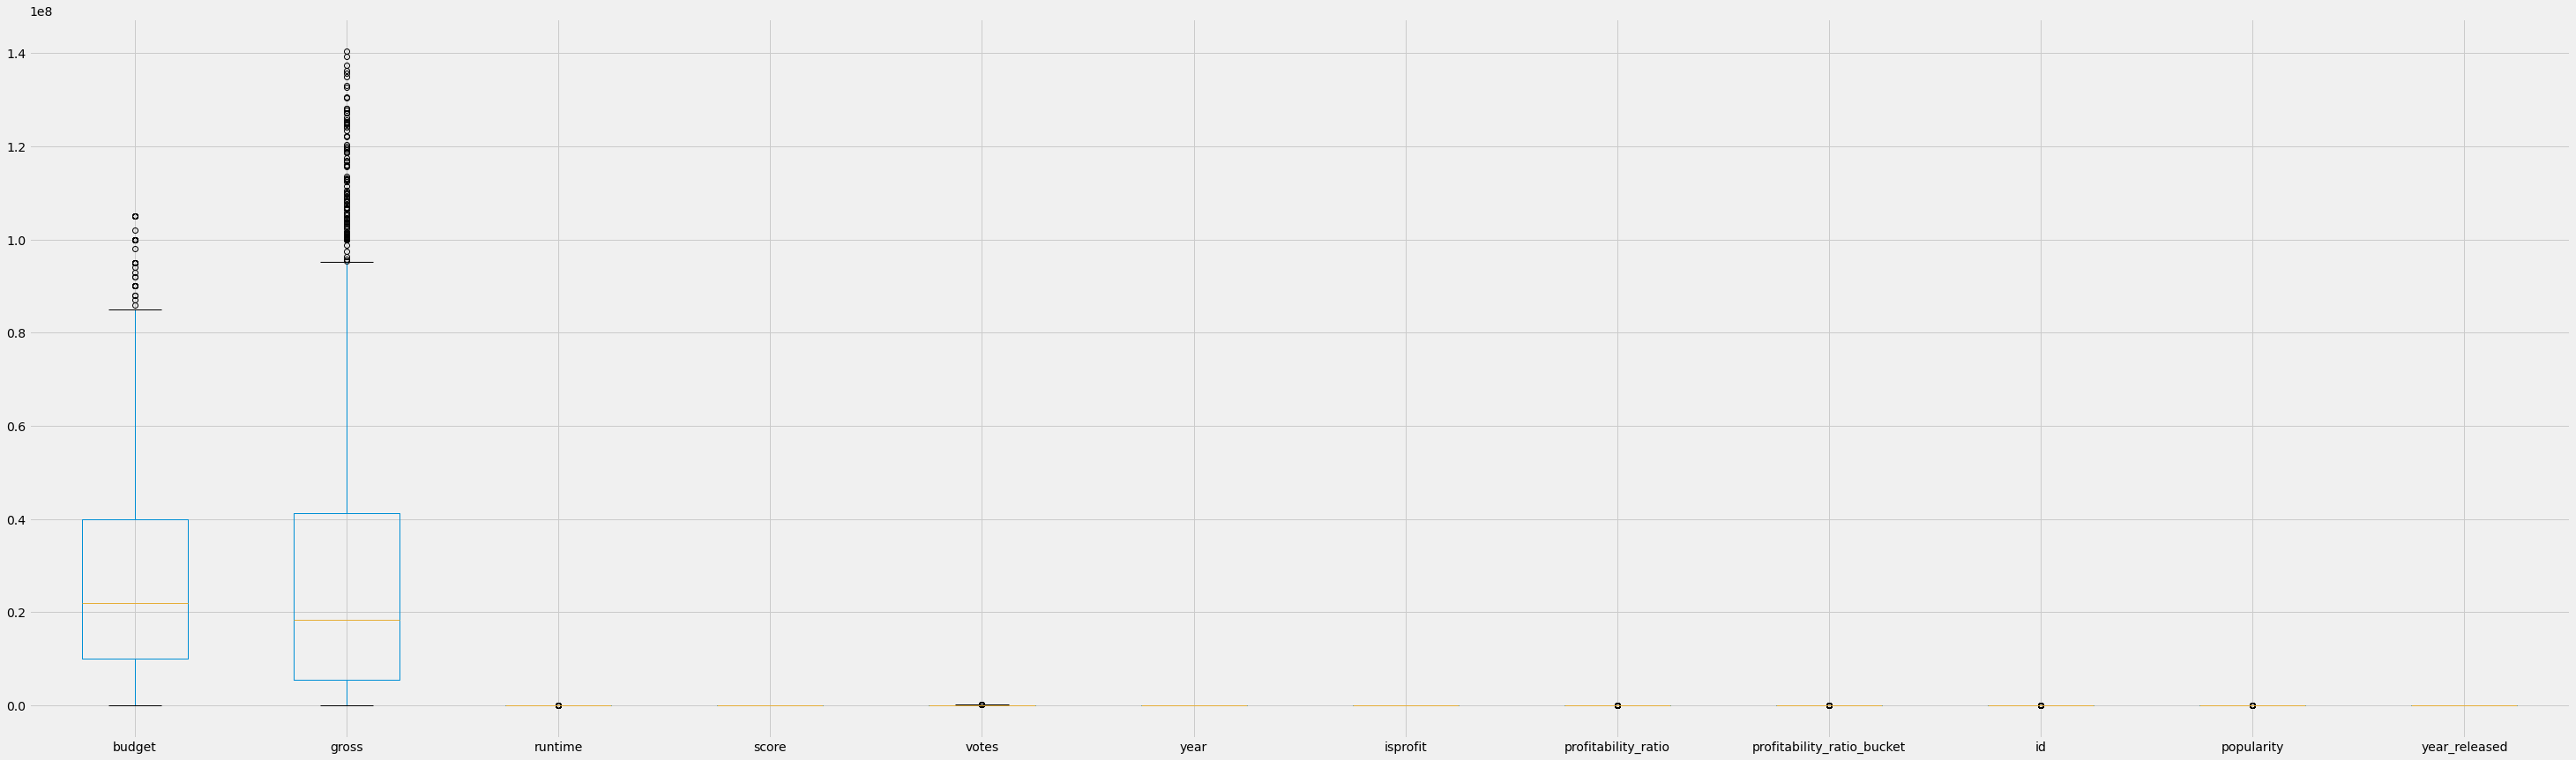

In [45]:
data_dropped_outlier_IQR.plot(x=data_dropped_outlier_IQR.index.name, kind='box', figsize=(46, 14))

Figure 4: Data Distribution of Outlier Data
<p>Figure 4 shows the distributoion of data after dropping outliers. The graph represents five number summary: “minimum, first quartile, median, third quartile, and ''maximum”. The ends of the box are the quartiles, Q1 and Q3, while the box length is interquartile range (IQR). Two lines (called whiskers) outside the box extend to the smallest (Minimum) and largest (Maximum) observations. The circles are the outliers.</p>

# 3. Data Transformation <a class="anchor" id="3"></a>

Our data has the following columns that we can perform transformation on:
* budget
* runtime
* score
* votes
* popularity

<p>
> We want to discretize and normalize the data so it will be ready for the modeling stage.
<br><br>
> After writing some general functions, we will perform the transformations one by one.
</p>

## 3.1. Binning <a class="anchor" id="31"></a>

Below, we iterate over all continuous features and use binning to discretize the data. At the end, we summarize the results by indicating the 4 intervals that our data was partitioned into.

In [46]:
for i in continuous_features:
    display(data_dropped_outlier_IQR[i].describe())

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4))

    display(pd.qcut(data_dropped_outlier_IQR[i], q=4).value_counts())

count    2.336000e+03
mean     2.812377e+07
std      2.282852e+07
min      2.000000e+04
25%      1.000000e+07
50%      2.200000e+07
75%      4.000000e+07
max      1.050000e+08
Name: budget, dtype: float64

0         (19999.999, 10000000.0]
1         (19999.999, 10000000.0]
2        (10000000.0, 22000000.0]
3         (19999.999, 10000000.0]
4        (22000000.0, 40000000.0]
                  ...            
2331    (40000000.0, 105000000.0]
2332     (22000000.0, 40000000.0]
2333      (19999.999, 10000000.0]
2334     (10000000.0, 22000000.0]
2335     (22000000.0, 40000000.0]
Name: budget, Length: 2336, dtype: category
Categories (4, interval[float64]): [(19999.999, 10000000.0] < (10000000.0, 22000000.0] < (22000000.0, 40000000.0] < (40000000.0, 105000000.0]]

(22000000.0, 40000000.0]     613
(10000000.0, 22000000.0]     608
(19999.999, 10000000.0]      586
(40000000.0, 105000000.0]    529
Name: budget, dtype: int64

count    2336.000000
mean      105.166952
std        14.093370
min        69.000000
25%        95.000000
50%       102.500000
75%       114.000000
max       150.000000
Name: runtime, dtype: float64

0       (68.999, 95.0]
1       (114.0, 150.0]
2       (114.0, 150.0]
3        (95.0, 102.5]
4        (95.0, 102.5]
             ...      
2331     (95.0, 102.5]
2332    (114.0, 150.0]
2333    (102.5, 114.0]
2334    (102.5, 114.0]
2335    (102.5, 114.0]
Name: runtime, Length: 2336, dtype: category
Categories (4, interval[float64]): [(68.999, 95.0] < (95.0, 102.5] < (102.5, 114.0] < (114.0, 150.0]]

(102.5, 114.0]    604
(68.999, 95.0]    593
(95.0, 102.5]     575
(114.0, 150.0]    564
Name: runtime, dtype: int64

count    2336.000000
mean        6.250856
std         0.840373
min         4.000000
25%         5.700000
50%         6.300000
75%         6.900000
max         8.200000
Name: score, dtype: float64

0         (6.3, 6.9]
1         (6.9, 8.2]
2         (6.9, 8.2]
3         (6.3, 6.9]
4         (6.9, 8.2]
            ...     
2331    (3.999, 5.7]
2332      (6.9, 8.2]
2333      (6.9, 8.2]
2334      (6.3, 6.9]
2335      (5.7, 6.3]
Name: score, Length: 2336, dtype: category
Categories (4, interval[float64]): [(3.999, 5.7] < (5.7, 6.3] < (6.3, 6.9] < (6.9, 8.2]]

(3.999, 5.7]    636
(6.3, 6.9]      610
(5.7, 6.3]      581
(6.9, 8.2]      509
Name: score, dtype: int64

count      2336.000000
mean      52168.505993
std       55622.410590
min         456.000000
25%       11899.750000
50%       31530.000000
75%       72160.500000
max      263834.000000
Name: votes, dtype: float64

0        (31530.0, 72160.5]
1       (72160.5, 263834.0]
2       (72160.5, 263834.0]
3       (11899.75, 31530.0]
4       (72160.5, 263834.0]
               ...         
2331     (31530.0, 72160.5]
2332    (72160.5, 263834.0]
2333     (31530.0, 72160.5]
2334     (31530.0, 72160.5]
2335    (11899.75, 31530.0]
Name: votes, Length: 2336, dtype: category
Categories (4, interval[float64]): [(455.999, 11899.75] < (11899.75, 31530.0] < (31530.0, 72160.5] < (72160.5, 263834.0]]

(455.999, 11899.75]    584
(11899.75, 31530.0]    584
(31530.0, 72160.5]     584
(72160.5, 263834.0]    584
Name: votes, dtype: int64

count    2336.000000
mean        7.708499
std         3.649485
min         0.000578
25%         5.222567
50%         7.514438
75%        10.082232
max        19.420510
Name: popularity, dtype: float64

0                         (5.223, 7.514]
1                        (7.514, 10.082]
2                       (10.082, 19.421]
3       (-0.00042200000000000007, 5.223]
4                       (10.082, 19.421]
                      ...               
2331                    (10.082, 19.421]
2332                     (7.514, 10.082]
2333                      (5.223, 7.514]
2334    (-0.00042200000000000007, 5.223]
2335                    (10.082, 19.421]
Name: popularity, Length: 2336, dtype: category
Categories (4, interval[float64]): [(-0.00042200000000000007, 5.223] < (5.223, 7.514] < (7.514, 10.082] < (10.082, 19.421]]

(-0.00042200000000000007, 5.223]    584
(5.223, 7.514]                      584
(7.514, 10.082]                     584
(10.082, 19.421]                    584
Name: popularity, dtype: int64

## 3.2. Normalization <a class="anchor" id="32"></a>

### 3.2.1. Z-score Method <a class="anchor" id="321"></a>

In [47]:
data_dropped_outlier_IQR[continuous_features].describe()

,budget,runtime,score,votes,popularity
count,2.336000e+03,2336.000000,2336.000000,2336.000000,2336.000000
mean,2.812377e+07,105.166952,6.250856,52168.505993,7.708499
std,2.282852e+07,14.093370,0.840373,55622.410590,3.649485
min,2.000000e+04,69.000000,4.000000,456.000000,0.000578
25%,1.000000e+07,95.000000,5.700000,11899.750000,5.222567
50%,2.200000e+07,102.500000,6.300000,31530.000000,7.514438
75%,4.000000e+07,114.000000,6.900000,72160.500000,10.082232
max,1.050000e+08,150.000000,8.200000,263834.000000,19.420510


In [48]:
scaler = StandardScaler()

In [49]:
data_dropped_z_score_scaled = pd.DataFrame(scaler.fit_transform(data_dropped_outlier_IQR[continuous_features]), columns=continuous_features)

In [50]:
data_dropped_z_score_scaled.describe()

,budget,runtime,score,votes,popularity
count,2336.000000,2.336000e+03,2.336000e+03,2.336000e+03,2.336000e+03
mean,0.000000,-4.258390e-17,1.292725e-17,2.433366e-17,-1.216683e-17
std,1.000214,1.000214e+00,1.000214e+00,1.000214e+00,1.000214e+00
min,-1.231345,-2.566788e+00,-2.678976e+00,-9.299054e-01,-2.112509e+00
25%,-0.794079,-7.215541e-01,-6.556307e-01,-7.241214e-01,-6.813191e-01
50%,-0.268308,-1.892750e-01,5.849114e-02,-3.711260e-01,-5.318621e-02
75%,0.520348,6.268862e-01,7.726130e-01,3.595003e-01,6.505689e-01
max,3.368273,3.181826e+00,2.319877e+00,3.806214e+00,3.209910e+00


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'isprofit'}>,
        <AxesSubplot:title={'center':'profitability_ratio'}>,
        <AxesSubplot:title={'center':'profitability_ratio_bucket'}>],
       [<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'year_released'}>]], dtype=object)

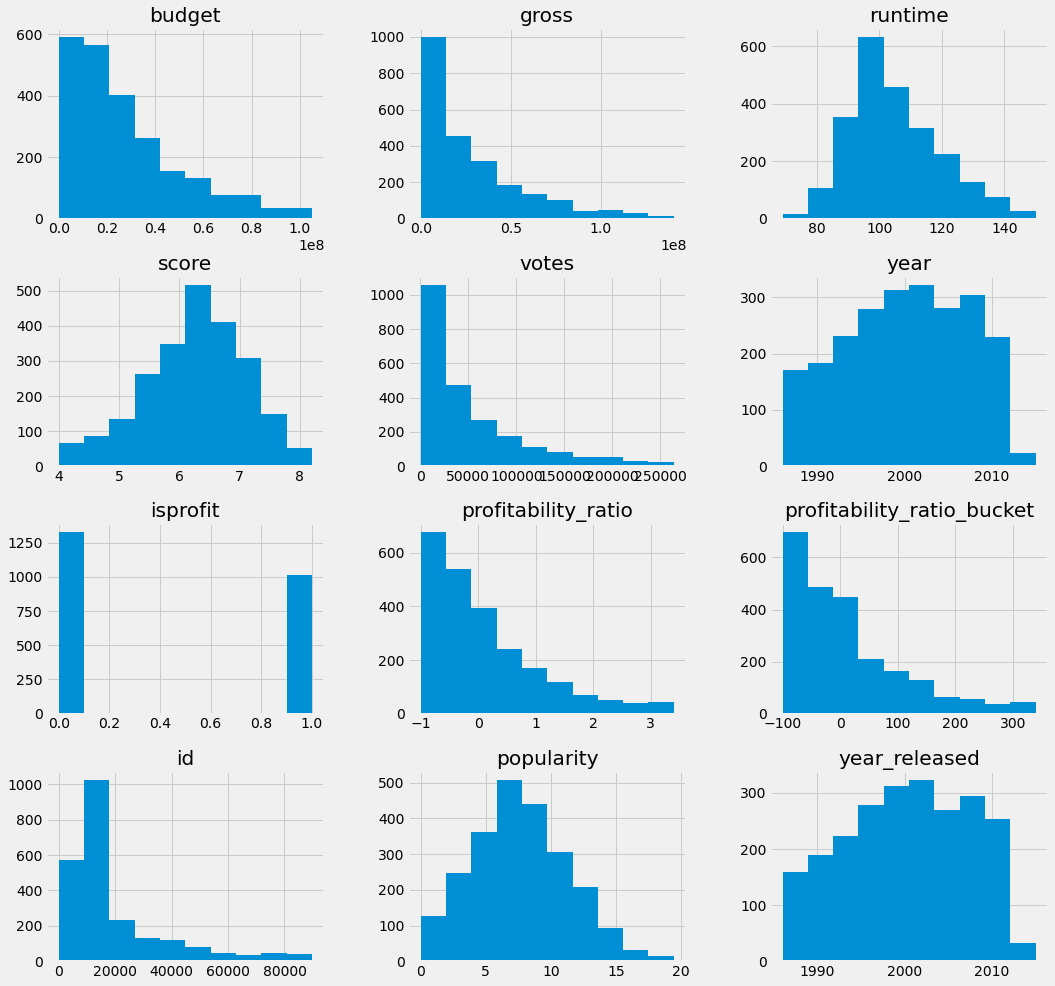

In [51]:
data_dropped_outlier_IQR.hist(figsize=(16, 16))

Figure 6: Histogram of Data Before Normalization
<p>Figure 6 shows the bar charts helping us visualize the data befor the five features above have been normalized.</p>

array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>]],
      dtype=object)

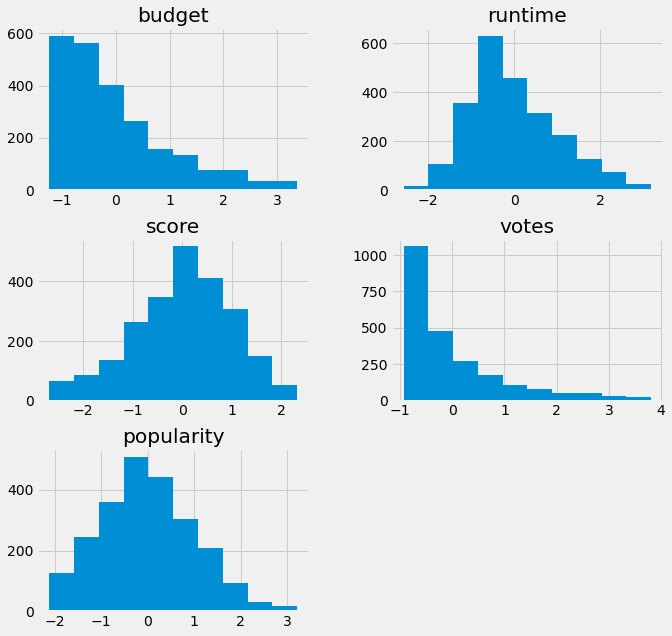

In [52]:
data_dropped_z_score_scaled.hist(figsize=(10, 10))

Figure 7: Histogram of Data After Normalization
<p>Figure 7 shows bar charts helping us visualize the data after the five features above have been normalized.</p>

Add normalized columns to main dataset as new columns labeled with the feature name they relate to followed by "_norm".

In [53]:
norm_column_names = ['budget_norm', 'runtime_norm', 'score_norm', 'votes_norm', 'popularity_norm']
    
for i, j in zip(norm_column_names, continuous_features):
    data_dropped_outlier_IQR[i] = pd.Series(data_dropped_z_score_scaled[j])


In [54]:
data_dropped_outlier_IQR.to_csv('data/training_data.csv')

# 4. Results <a class="anchor" id="4"></a>

## 4.1. Data Cleaning <a class="anchor" id="41"></a>

As we analyze all the features in <a href="#21">Section 2.1.</a> we can see that the only features that need cleaning are overview, tagline, spoken_languages_edited, production_countries_edited and keywords_edited. The rest of the features are clean meaning not missing any values that require either dropping or replacement of those values.

## 4.2. Data Transformation <a class="anchor" id="42"></a>

After analyzing and cleaning the five categorical features found in <a href="#21">Section 2.1.</a> we are able to focus on transforming our data.  

<p>Our data includes categorical and continuous types but for transformation we want to focus on five that need to be discretized and normalized in order to be ready for modeling. These five features include budget, runtime, score, votes and popularity. The reason for discretizing the data is so we can partition the data into equal distributions that will be easier to manage and manipulate. After that we can use normalization to give all the attributes an equal weight which is useful to us in the following section where we model our data.</p>